# Question 1 .3
# DecisionTreeClassifier

In [33]:
! pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [34]:
# Load the dataset into a Pandas DataFrame
data=pd.read_csv('SEER Breast Cancer Dataset.csv')
df=pd.DataFrame(data)
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [35]:
data.info() #find about null values, datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [36]:
df.isnull().sum()  #find missing values


Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64

In [37]:
df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True) # Remove columns with missing value

In [38]:
print("Number of duplicates:", df.duplicated().sum())
#remove duplicates
df.drop_duplicates()

Number of duplicates: 1


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,White,Married (including common law),T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive


In [39]:
#Label encoding for a categorical feature
label_encoder = preprocessing.LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

Status
0    3408
1     616
Name: count, dtype: int64


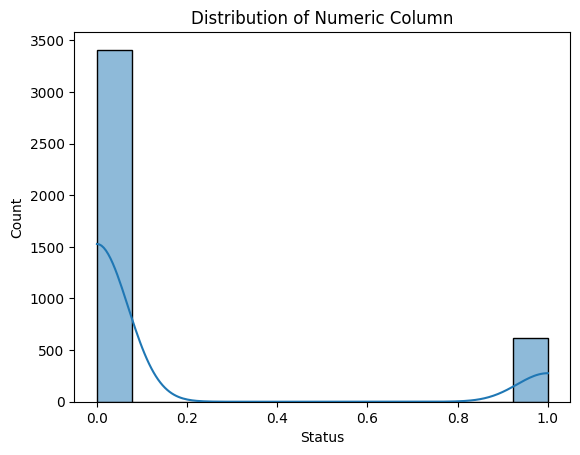

In [40]:
# Create a histogram
print(df['Status'].value_counts()) 
sns.histplot(df['Status'], kde=True)
plt.title('Distribution of Numeric Column')
plt.show()

In [41]:
# Display summary statistics
summary_stats = df.describe()
print(summary_stats)

               Age        Race   Marital Status     T Stage       N Stage  \
count  4024.000000  4024.000000     4024.000000  4024.000000  4024.000000   
mean     53.972167     1.775845        1.371272     0.784791     0.438370   
std       8.963134     0.564465        1.063637     0.765531     0.693479   
min      30.000000     0.000000        0.000000     0.000000     0.000000   
25%      47.000000     2.000000        1.000000     0.000000     0.000000   
50%      54.000000     2.000000        1.000000     1.000000     0.000000   
75%      61.000000     2.000000        1.000000     1.000000     1.000000   
max      69.000000     2.000000        4.000000     3.000000     2.000000   

         6th Stage        Grade      A Stage   Tumor Size  Estrogen Status  \
count  4024.000000  4024.000000  4024.000000  4024.000000      4024.000000   
mean      1.321819     0.690358     0.977137    30.473658         0.933151   
std       1.266624     1.016418     0.149485    21.119696         0.2497

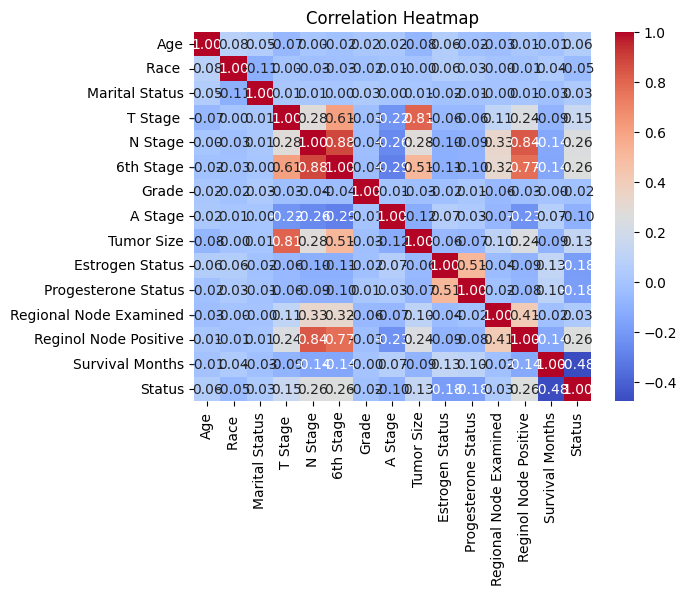

In [42]:
# Create a correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [43]:
#Split data
X=df.drop(columns='Status')
Y=df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)
#Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


# Decision Tree Classification

In [44]:
clf = DecisionTreeClassifier(criterion="gini",random_state=1)
clf.fit(X_train,y_train) #Training process
y_pred=clf.predict(X_test) #Predicting Process
 #Evaluation Process
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

  # Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1023
           1       0.55      0.54      0.55       185

    accuracy                           0.86      1208
   macro avg       0.73      0.73      0.73      1208
weighted avg       0.86      0.86      0.86      1208



Text(0.5, 427.9555555555555, 'Predicted label')

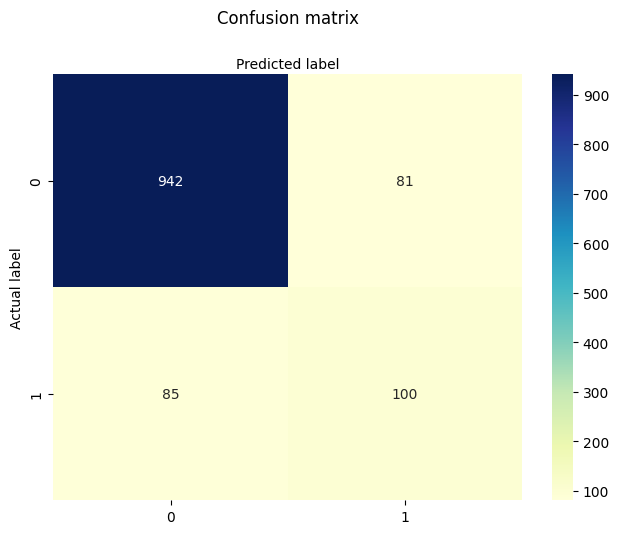

In [45]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

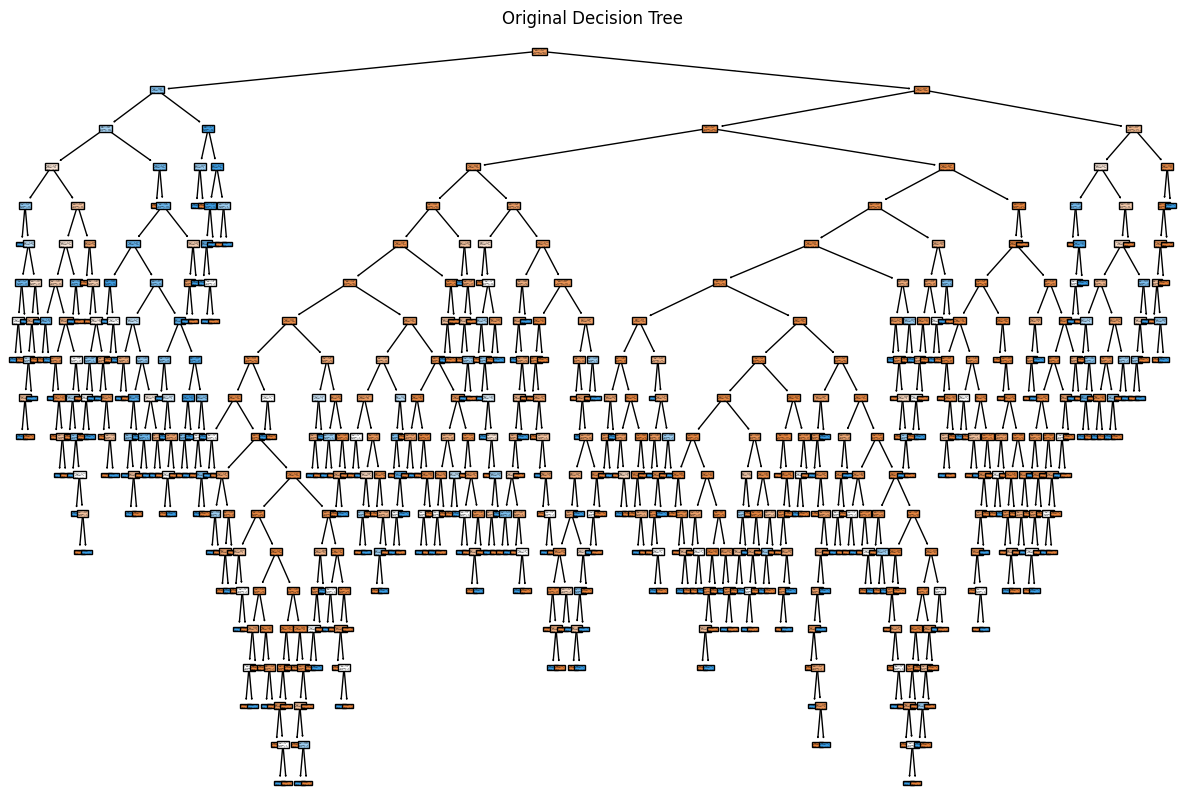

In [46]:
# Plot original tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True)
plt.title("Original Decision Tree")
plt.show()

# Pruned Decision Tree

In [47]:
# Cost-complexity pruning (Post-pruning)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# Train a series of decision trees with different alpha values
clfs = []= []
for ccp_alpha in ccp_alphas:
    pruned_model = DecisionTreeClassifier(criterion="gini", ccp_alpha=ccp_alpha,random_state=1)
    pruned_model.fit(X_train, y_train)
    clfs.append(pruned_model)

# Find best accuracy on test data
best_accuracy = 0
best_pruned_model = None
for pruned_model in clfs:
    accuracy = pruned_model.score(X_test, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_pruned_model = pruned_model
# Evaluation process after pruning
y_predic=best_pruned_model.predict(X_test)
accuracy_after_pruning = best_pruned_model.score(X_test, y_test)

print(f"Accuracy after pruning: {accuracy_after_pruning:.2f}")
  # Generate a classification report
report = classification_report(y_test, y_predic)
print("Classification Report After Pruning:")
print(report)
#print(best_pruned_model.score(X_train, y_train))

Accuracy after pruning: 0.91
Classification Report After Pruning:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1023
           1       0.85      0.50      0.63       185

    accuracy                           0.91      1208
   macro avg       0.88      0.74      0.79      1208
weighted avg       0.91      0.91      0.90      1208



Text(0.5, 427.9555555555555, 'Predicted label')

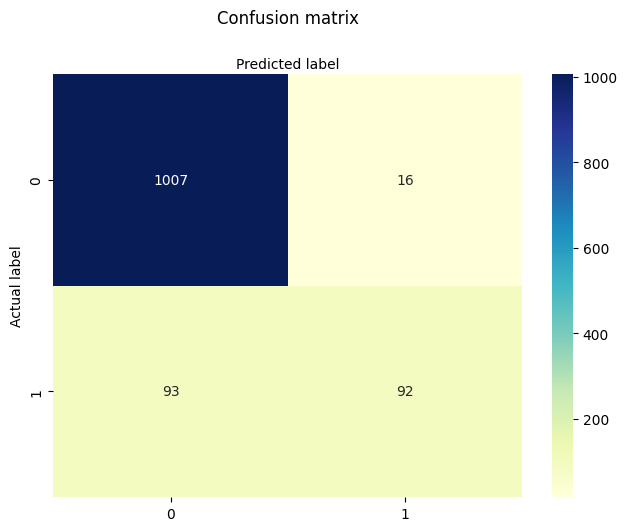

In [48]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_predic)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

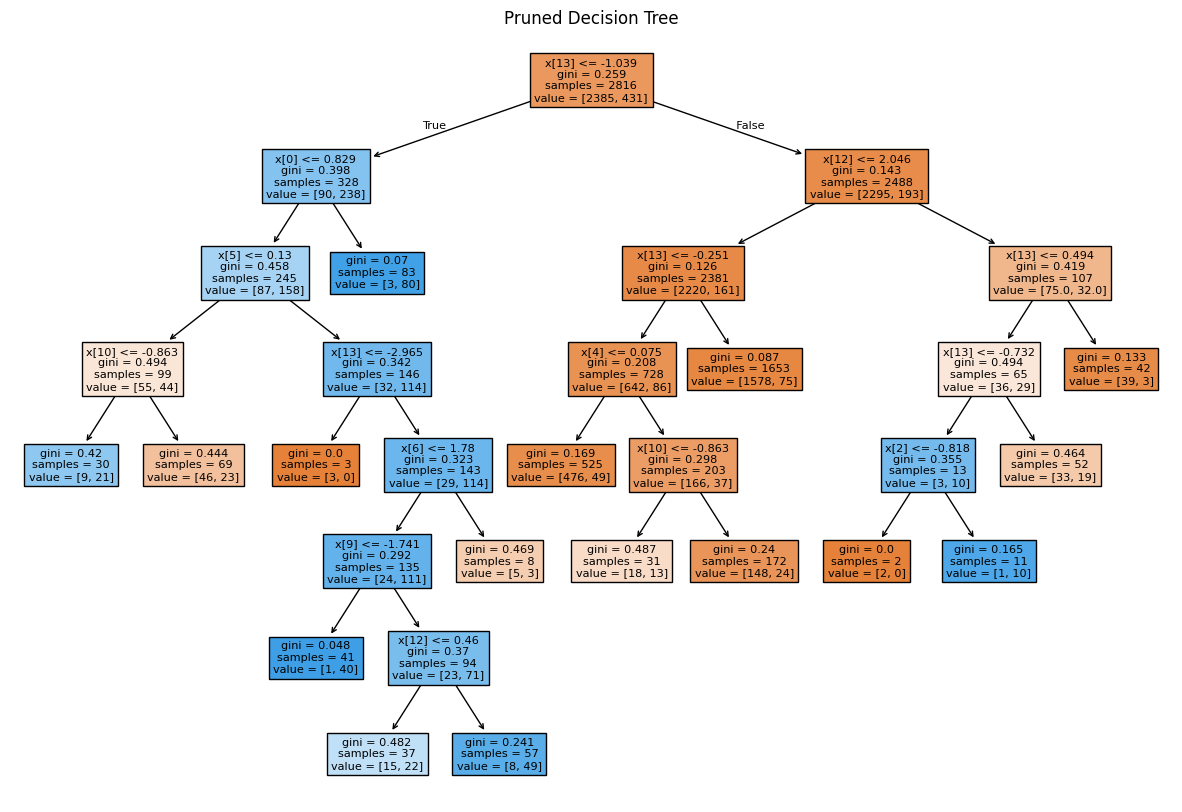

In [49]:
# Plot pruned tree
plt.figure(figsize=(15, 10))
plot_tree(best_pruned_model, filled=True)
plt.title("Pruned Decision Tree")
plt.show()

0.8404824179017727


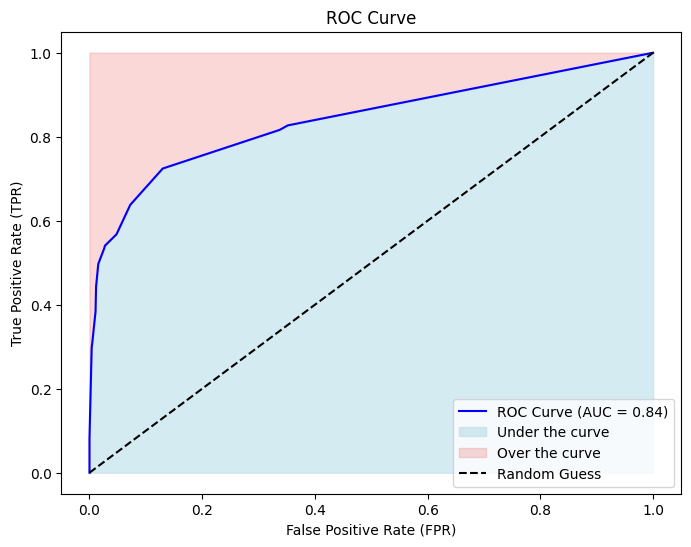

In [50]:
#ROC, AUC
y_probs = best_pruned_model.predict_proba(X_test)[:, 1]

# compute tpr,fpr, thersholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
#Compute AUC
auc = roc_auc_score(y_test, y_probs)
print(auc)
# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='blue')
plt.fill_between(fpr, tpr, color='lightblue', alpha=0.5, label='Under the curve')
plt.fill_between(fpr, tpr, 1, color='lightcoral', alpha=0.3, label='Over the curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

In [51]:
logreg = LogisticRegression(random_state=1)
# fit the model with data
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)
 #Evaluation Process
accuracy = accuracy_score(y_test, y_predic)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred_log)
print("Classification Report:")
print(report)
#print(logreg.score(X_train, y_train))

Logistic Regression Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1023
           1       0.82      0.44      0.57       185

    accuracy                           0.90      1208
   macro avg       0.86      0.71      0.76      1208
weighted avg       0.89      0.90      0.89      1208



Text(0.5, 427.9555555555555, 'Predicted label')

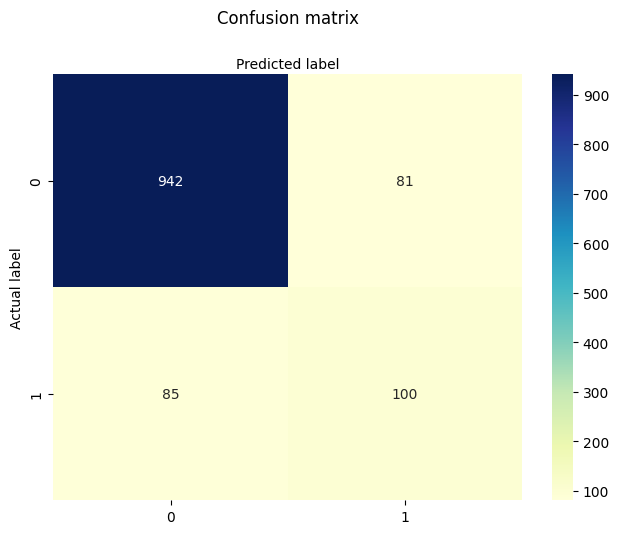

In [52]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Mean

In [53]:
#probabilistic decision tree and logistic regression
y_proba_tree = best_pruned_model.predict_proba(X_test)
y_proba = logreg.predict_proba(X_test)
#Mean
Mean=(y_proba_tree +y_proba)/2
Mean=Mean.argmax(axis=1)
predictions = (Mean >= 0.5).astype(int)
 #Evaluation Process
print(f"Mean Accuracy: {accuracy:.2f}")
# Generate a classification report
report = classification_report(y_test, predictions)
print("Mean Classification Report:")
print(report)

Mean Accuracy: 0.91
Mean Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1023
           1       0.82      0.48      0.61       185

    accuracy                           0.90      1208
   macro avg       0.87      0.73      0.78      1208
weighted avg       0.90      0.90      0.89      1208



Text(50.722222222222214, 0.5, 'Actual label')

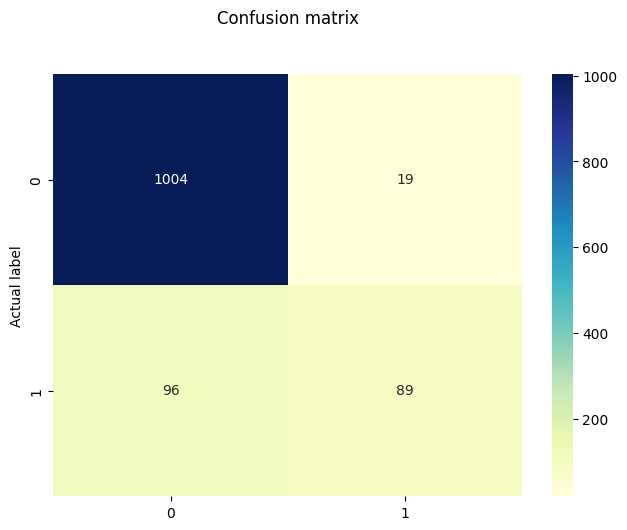

In [54]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, Mean)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')

# Question 2.3
# Logistic Regression

In [55]:
SEED = 1

import random
random.seed(SEED)  

import numpy as np
np.random.seed(SEED)  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
# it's important to set the random_state parameter when using models or functions that involve randomness, such as LogisticRegression, DecisionTreeClassifier, or train_test_split

## With vectorization

In [56]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

class LogisticRegression:
  
    # TODO : Use vectorization techniques like NumPy array operations to perform the operations. Avoid using loops when vectorization is possible.
  
    def __init__(self, alpha = 0.01, num_iters = 1000, degree = 1, lambda_ = 0.0):
        """
        Initializes the Logistic Regression model with polynomial feature transformation.
        
        Args:
          alpha (float): Learning rate for gradient descent.
          num_iters (int): Number of iterations for gradient descent.
          degree (int): The degree of the polynomial features.
        """
        self.alpha = alpha
        self.num_iters = num_iters
        self.degree = degree
        self.lambda_= lambda_
        self.w = None
        self.b = 0
        self.poly = PolynomialFeatures(degree=self.degree)


    def transform_features(self, X):
        """
        Transforms the features using polynomial transformation.
        
        Args:
          X (ndarray (m, n)): Data, m examples with n features.
          
        Returns:
          X_poly (ndarray): Transformed data with polynomial features.
        """
        return self.poly.fit_transform(X)
    def sigmoid(self,z):
      return 1 / (1 + np.exp(-z))
    
    def compute_cost(self,w,b, X, y):
        """
        Computes the cost function for logistic regression.
        
        Args:
          X (ndarray (m, n)): Data, m examples with n features.
          y (ndarray (m,)) : Target values.
          
        Returns:
          cost (float): The computed cost.
        """
        # TODO :
        z = X @ w+b
        # applying the sigmoid function to get predicted probabilities
        predictions = self.sigmoid(z)
        # binary cross-entropy loss
        cost= -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return cost


    def compute_gradient(self,w, b, X, y):
        """
        Computes the gradient of the cost function.
        
        Args:
          X (ndarray (m, n)): Data, m examples with n features.
          y (ndarray (m,)): Target values.
          
        Returns:
          dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
          dj_db (float): The gradient of the cost w.r.t. the parameter b. 
        """
        # TODO :
        z = X @ w+b
        predictions = self.sigmoid(z)
      # error = difference between predicted and true labels
        errors = predictions - y
        dj_dw = (X.T @ errors) / len(y) + (self.lambda_ / len(y)) * w
        dj_db = np.sum(errors) / len(y)
        
        return dj_dw, dj_db
  
    def gradient_descent(self, X, y):
        """
        Performs batch gradient descent to update model parameters.
        
        Args:
          X (ndarray (m, n)): Data, m examples with n features.
          y (ndarray (m,)): Target values.
          
        Returns:
          J_history (list): List of cost values over iterations.
        """
        # TODO
        self.w = np.zeros(X.shape[1])  # start with all weights equal to 0
        loss_history = [self.compute_cost(self.w,self.b, X, y)]
        for step in range(1, self.num_iters + 1):
          dj_dw, dj_db = self.compute_gradient(self.w, self.b, X, y)
          self.w -= self.alpha * dj_dw
          self.b -= self.alpha * dj_db  # update rule
          cost = self.compute_cost(self.w,self.b, X, y)
          loss_history.append(cost)
                
        return self.w, self.b, loss_history



    def fit(self, X, y):
        """
        Fits the model to the training data using gradient descent.
        
        Args:
          X (ndarray (m, n)): Data, m examples with n features.
          y (ndarray (m,)): Target values.
          
        Returns:
          J_history (list): List of cost values over iterations.
        """
        if self.degree != 1:
            # Transform the features using polynomial transformation
            X_poly = self.transform_features(X)
            return self.gradient_descent(X_poly, y)
        return self.gradient_descent(X, y)

    def predict(self, X):
        """
        Predicts the labels for the given data using the trained model.
        
        Args:
          X (ndarray (m, n)): Data, m examples with n features.
          
        Returns:
          predictions (ndarray (m,)): The predicted labels (0 or 1).
        """
        if self.degree != 1:
          X = self.transform_features(X)
          # TODO : treat X_poly same as X

        z = X @ self.w + self.b
        probabilities = self.sigmoid(z)
        predictions = (probabilities >= 0.5).astype(int) #decission rule for binary classification
        
        return predictions

        # TODO :
        

    def plot_decision_boundary(self, X, y):
        """
        Plots the decision boundary for the logistic regression model.
        
        Args:
          X (ndarray (m, n)): Data, m examples with 2 features.
          y (ndarray (m,)): Target values.
        """
        plt.figure(figsize=(8, 6))
        plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
        plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')

        # Generate a grid of values to evaluate the decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(grid_points)
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.2, cmap="coolwarm")
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Logistic Regression Decision Boundary')
        plt.legend()
        plt.show()

    def predict_possibility(self, X):
        z = X @ self.w + self.b
        prob = self.sigmoid(z)
        return prob

# Data Generartion

(200, 2)
[-0.22367705  1.31690796]
X_train shape: (140, 2)
X_test shape: (60, 2)
y_train shape: (140,)
y_test shape: (60,)
alpha:0.01,lambda: 0.0,train_accuracy:94.29 %,test-accuracy:95.00%
alpha:0.01,lambda: 0.1,train_accuracy:94.29 %,test-accuracy:95.00%
alpha:0.01,lambda: 1.0,train_accuracy:94.29 %,test-accuracy:95.00%
alpha:0.01,lambda: 7,train_accuracy:92.86 %,test-accuracy:93.33%
alpha:0.01,lambda: 10.0,train_accuracy:92.86 %,test-accuracy:93.33%
alpha:0.001,lambda: 0.0,train_accuracy:87.86 %,test-accuracy:91.67%
alpha:0.001,lambda: 0.1,train_accuracy:87.86 %,test-accuracy:91.67%
alpha:0.001,lambda: 1.0,train_accuracy:87.86 %,test-accuracy:91.67%
alpha:0.001,lambda: 7,train_accuracy:87.86 %,test-accuracy:91.67%
alpha:0.001,lambda: 10.0,train_accuracy:87.86 %,test-accuracy:91.67%
alpha:0.0001,lambda: 0.0,train_accuracy:87.86 %,test-accuracy:91.67%
alpha:0.0001,lambda: 0.1,train_accuracy:87.86 %,test-accuracy:91.67%
alpha:0.0001,lambda: 1.0,train_accuracy:87.86 %,test-accuracy:91.6

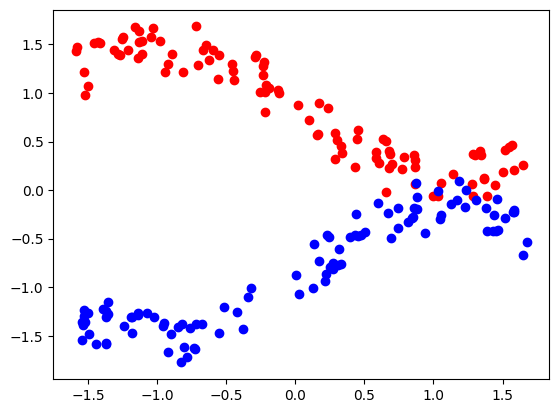

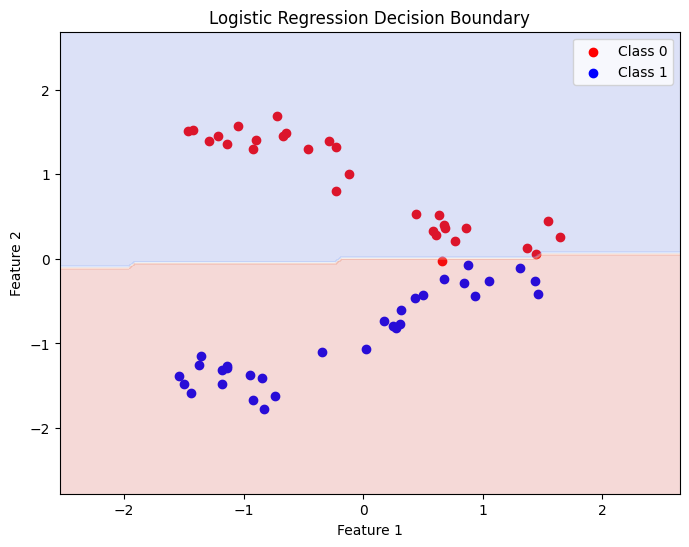

In [57]:
X_1=np.random.uniform(low=-5,high=5,size=100) 
X_2=np.random.uniform(low=-5,high=5,size=100) 
y_1=-5*np.sin(0.5*X_1)+12+np.random.uniform(low=-2,high=2,size=100) 
y_2=5*np.sin(0.5*X_2)+np.random.uniform(low=-2,high=2,size=100) 
X_concated = np.array(np.concatenate((X_1, X_2), axis=0)).reshape(-1, 1) 
y_concated = np.array(np.concatenate((y_1, y_2), axis=0)).reshape(-1,1) 
labels=np.array([0]*len(y_1)+[1]*len(y_2)) #Create class label for data 
index_col = np.arange(len(y_concated)) 
X_concated = np.hstack([X_concated,y_concated],)
print(X_concated.shape) 
scaler = StandardScaler() 

X_concated = scaler.fit_transform(X_concated) 
print(X_concated[0]) 

plt.scatter(X_concated[labels == 0, 0], X_concated[labels == 0, 1], color='red', label='Class 0') 
plt.scatter(X_concated[labels == 1, 0], X_concated[labels == 1, 1], color='blue', label='Class 1')

# Create bins for stratification (e.g., 10 bins)
bins = np.linspace(0, len(index_col), 10)  # Dividing indices into 10 bins
index_binned = np.digitize(index_col, bins)  # Convert indices into bin numbers

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_concated, labels, stratify=index_binned,test_size=0.3, random_state=1)

# Print the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


# Choose the best params
alphas = [0.01, 0.001, 0.0001]
lambdas = [0.0, 0.1, 1.0, 7, 10.0]

results = []
for alpha in alphas:
    for la in lambdas:
        reg_model = LogisticRegression(alpha=alpha, num_iters=1000, degree=2, lambda_=la)
        
        reg_model.fit(X_train, y_train)
        
        y_train_pred = reg_model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        
        y_test_pred = reg_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        results.append((alpha, la, train_accuracy, test_accuracy))
        print(f"alpha:{alpha},lambda: {la},train_accuracy:{train_accuracy*100:.2f} %,test-accuracy:{test_accuracy * 100:.2f}%")

model = LogisticRegression()

# Step 3: Train the model
model.fit(X_train, y_train)

# Step 4: Predict on the test set and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"test Accuracy: {accuracy * 100:.2f}%")

# Predict on the train set and calculate accuracy
y_train_predicted = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_predicted)
print(f"train Accuracy: {train_accuracy * 100:.2f}%")


# X_train_poly= model.transform_features(X_train)
# train_probab= model.predict_possibility(X_train_poly)
# data_near_to_middle = []
# for prob in train_probab:
#     if 0.45 < prob < 0.55:
#         data_near_to_middle.append(prob)
# print("number of train_probab in near of middle(0.5)", len(data_near_to_middle))


model.plot_decision_boundary(X_test, y_test)


# Calibration

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [59]:
# Step 1
#TODO: Split the data into train, calibration, test with ratio of 70, 15, 15 respectively

In [60]:
SEED = 1
data=pd.read_csv('SEER Breast Cancer Dataset.csv')
df=pd.DataFrame(data)
df.head()

df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)
# Remove columns with missing value
print("Number of duplicates:", df.duplicated().sum())

#remove duplicates
df.drop_duplicates()

#Label encoding for a categorical feature
label_encoder = preprocessing.LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

#Split data
X=df.drop(columns='Status')
y=df['Status']

X_train,X_validation, y_train, y_validation = train_test_split(X, y, stratify=y, test_size=0.3, random_state=SEED)
X_calibration, X_test,y_calibration, y_test = train_test_split(X_validation,
                                                               y_validation, stratify=y_validation, test_size=0.5, random_state=SEED)


Number of duplicates: 1


In [61]:
#TODO: Fit a decision tree on the train data and get prediction probs on test data and calibration data & evaluate
# step 2

recall: %s 0.4838709677419355
precision: %s 0.8035714285714286
precision: %s 0.8035714285714286
recall: %s 0.4838709677419355
f1_score: %s 0.6040268456375839
accuracy :%s 0.902317880794702


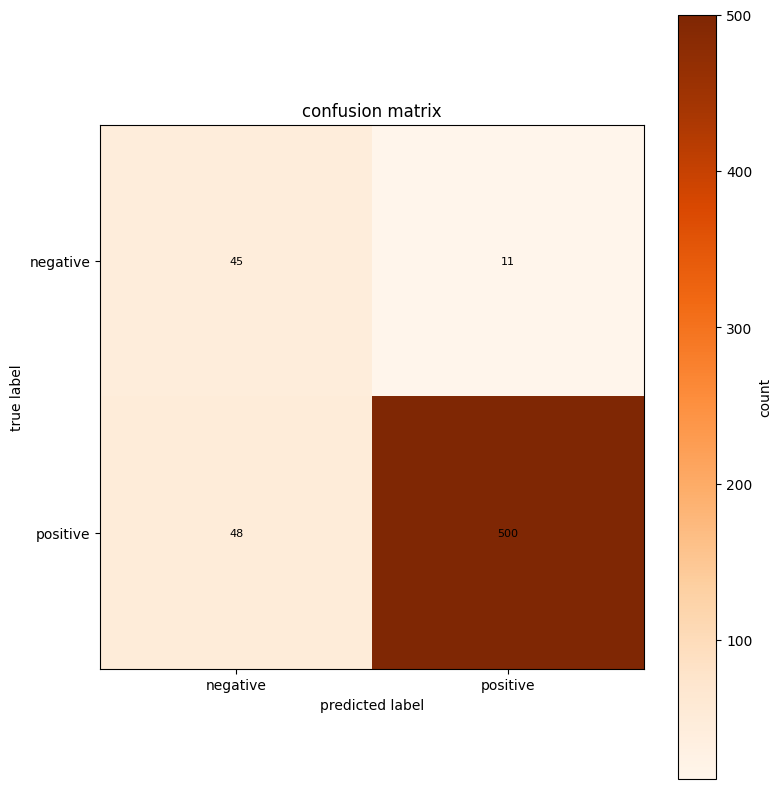

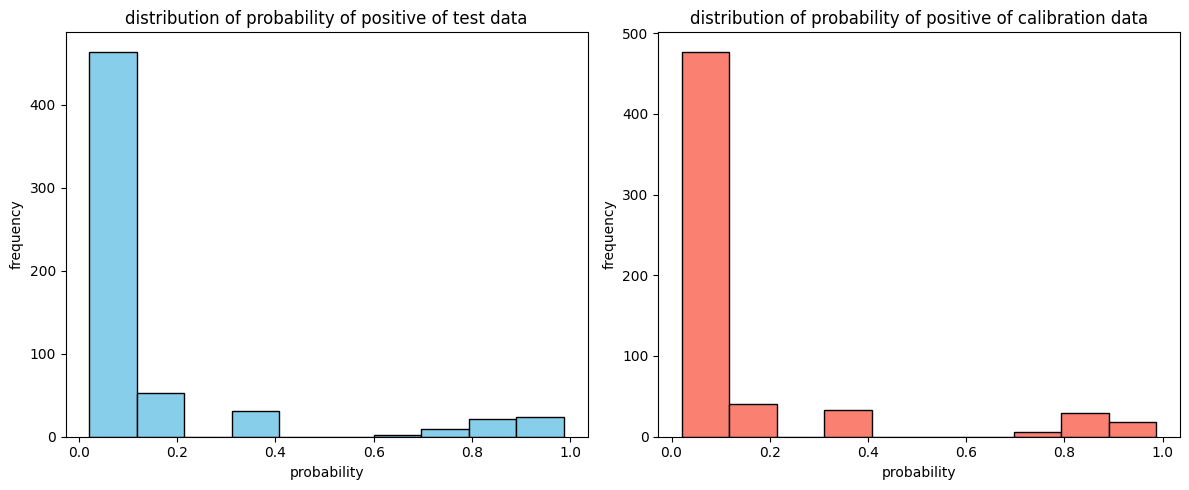

In [62]:
class Evaluate:
    def __init__(self, prediction, original):
        self.prediction = prediction
        self.original = original
        tp, fp, fn, tn = self.confusion_matrix()
        self.matrix = np.array([[tp, fp], [fn, tn]])

    def accuracy_score(self):
        if np.sum(self.matrix)== 0:
            accuracy = 0
        else:
            accuracy = (self.matrix[0, 0]+ self.matrix[1,1]) /np.sum(self.matrix)
        print("accuracy :%s", accuracy)
        return accuracy

    def recall(self):
        recall =self.matrix[0,0]/ (self.matrix[0, 0] +self.matrix[1,0])
        print("recall: %s", recall )
        return recall

    def precision(self):
        precision = self.matrix[0,0]/(self.matrix[0, 1]+self.matrix[0,0])
        print( "precision: %s", precision)
        return precision

    def f_1_score(self):
        precision = self.precision()
        recall = self.recall()
        f1_score = 2 * (recall * precision) / (recall + precision)
        print( "f1_score: %s", f1_score)

    def confusion_matrix(self):

        self.prediction= np.array(self.prediction)
        self.original =np.array(self.original)

        true_positive= np.sum((self.prediction== 1) &(self.original == 1)) #TP
        false_positive =np.sum((self.prediction== 1) & (self.original == 0)) #FP
        false_negative= np.sum((self.prediction==0)& (self.original == 1))#FN
        true_negative =np.sum((self.prediction== 0) &(self.original == 0))#TN
        return true_positive, false_positive, false_negative, true_negative

    def plot_confusion_matrix(self):
        plt.figure(figsize=(8, 8))
        plt.imshow(self.matrix, cmap='Oranges', interpolation='nearest')
        plt.colorbar(label='count')
        plt.title('confusion matrix')
        plt.xlabel('predicted label')
        plt.ylabel('true label')
        plt.xticks([0, 1], ['negative', 'positive'])
        plt.yticks([0, 1], ['negative', 'positive'])
        for row in range(2):
            for column in range(2):
                plt.text(column, row, str(self.matrix[row][column]),
                         horizontalalignment="center",
                         verticalalignment='center',
                         fontsize=8)
        plt.tight_layout()
        plt.show()
        

clf = DecisionTreeClassifier(criterion="gini", max_depth=4,random_state=SEED)

#tain on train dataset
clf.fit(X=X_train,y=y_train) #train process

#predictions on testing dataset
y_test_predicted = clf.predict(X=X_test)

eval = Evaluate(prediction=y_test_predicted, original=y_test) #evaluating
eval.recall()
eval.precision()
eval.f_1_score()
eval.accuracy_score()
eval.plot_confusion_matrix()

# get prediction probs on test data on DecisionTreeClassifier data
probas_of_test_data = clf.predict_proba(X=X_test)
_, prob_positive_of_test_data = probas_of_test_data[:, 0], probas_of_test_data[:, 1] # split data

# get prediction probs on calibration data on DecisionTreeClassifier data
probas_of_calibration_data = clf.predict_proba(X=X_calibration)
_, prob_positive_of_calibration_data = (
    probas_of_calibration_data[:, 0], probas_of_calibration_data[:, 1])# split data

# plot distribution of probability for positive of test data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(prob_positive_of_test_data, bins=10, color='skyblue', edgecolor='black')
plt.title("distribution of probability of positive of test data")
plt.xlabel("probability")
plt.ylabel("frequency")

# plot distribution of probability for positive of calibration data
plt.subplot(1, 2, 2)
plt.hist(prob_positive_of_calibration_data, bins=10, color='salmon', edgecolor='black')
plt.title("distribution of probability of positive of calibration data")
plt.xlabel("probability")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()



In [63]:
# Step 3
#TODO: Fit a logistic regression on the probs of the decision tree on calibration data

# train regression logistic on calibration prob
calibration_model = LogisticRegression(random_state=SEED)
calibration_model.fit(X=prob_positive_of_calibration_data.reshape(-1, 1), y=y_calibration)
# getting probabilities by decision tree  on calibration data
calibrated_test_probs = calibration_model.predict_proba(X=prob_positive_of_test_data.reshape(-1, 1))
_, prob_positive_of_calibrated_test = calibrated_test_probs[:, 0], calibrated_test_probs[:, 1]


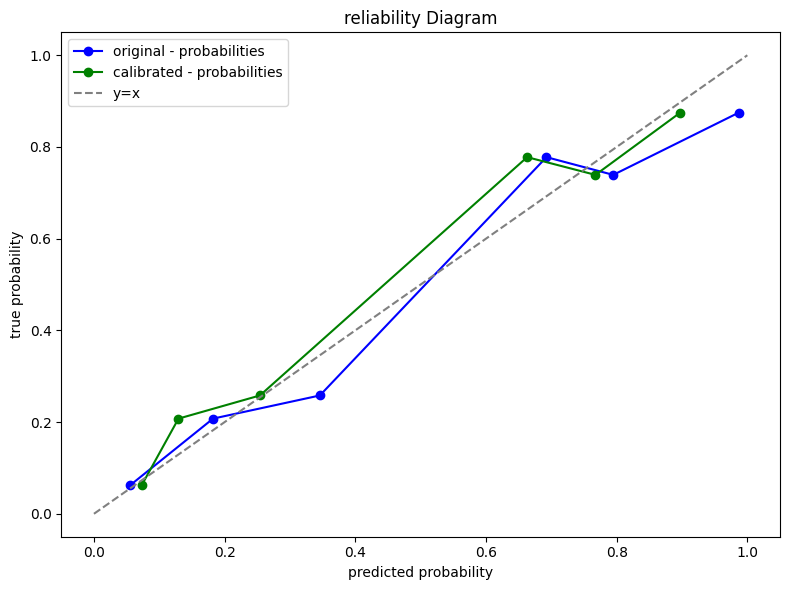

In [64]:
# step 4 & 5
#TODO: Input the prediction probs of decision tree on test data to the logistic regression model and get the calibrated probs

def plot_reliability_diagram(y_true, y_prob, y_prob_calibrated, n_bins=10):
    def get_reliability_points(y_true, y_prob):
        nbins_of_linespace = n_bins +1
        bins = np.linspace(0, 1, nbins_of_linespace)
        bin_width = bins[1] - bins[ 0]  #width of bins
        bin_centers = bins[: -1] + bin_width / 2 # make shift bins
        bin_indices = np.digitize(y_prob,bins)- 1  # -1 is need for zero indexing,last value in the array is always 0
        #probabily in each bin
        bin_of_true = np.array([np.mean(y_true[bin_indices == bin]) if np.any(bin_indices == bin)
                                  else np.nan for bin in range(n_bins)])
        bin_pred = np.array([np.mean(y_prob[bin_indices == bin]) if np.any(bin_indices == bin)
                                  else np.nan for bin in range(n_bins)])
        #filter bins
        valid_bins = ~np.isnan(bin_of_true)

        return bin_centers[valid_bins], bin_of_true[valid_bins], bin_pred[valid_bins]

    plt.figure(figsize=(8, 6))
    _, bin_of_true, bin_pred = get_reliability_points(y_true, y_prob)# for origin data
    plt.plot(bin_pred, bin_of_true, marker='o', color='blue', label="original - probabilities")

    _, bin_true_prob_cal, bin_pred_prob_cal = get_reliability_points(y_true, y_prob_calibrated) # diagram for calibrated
    plt.plot(bin_pred_prob_cal, bin_true_prob_cal, marker='o', color='green', label="calibrated - probabilities")

    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="y=x")    # y=x line

    plt.xlabel("predicted probability")
    plt.ylabel("true probability")
    plt.title("reliability Diagram")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_reliability_diagram(y_test, prob_positive_of_test_data, prob_positive_of_calibrated_test)

